# Search Questions

### How to determine the value of eps ?

1. Elbow Method
    * Compute distance of each point using KNN (k=MinPts)
    * Sort distances acsendingly
    * Plot them and look for the elbow
    * The y value at this elbow is a good choice for eps
2. Domain knowledge and experimentation
3. Rule of thumb
    * MinPts = 2 * no of features
    * eps should be slightly larger thatn the average distance of points in small cluster

### How to code Dendrogram in Hierarchal clustering?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

In [2]:
# Generate random data for clustering
X, _ = make_blobs(n_samples=10, centers=3, random_state=42)

In [3]:
# Perform hierarchical clustering
Z = linkage(X, method='ward')

Other methods for linkage:  
* 'ward' -> minimizes variance within clusters
* 'single' -> Uses the minimum distance between clusters.
* 'complete' -> Uses the maximum distance.
* 'average' -> Uses the average distance.

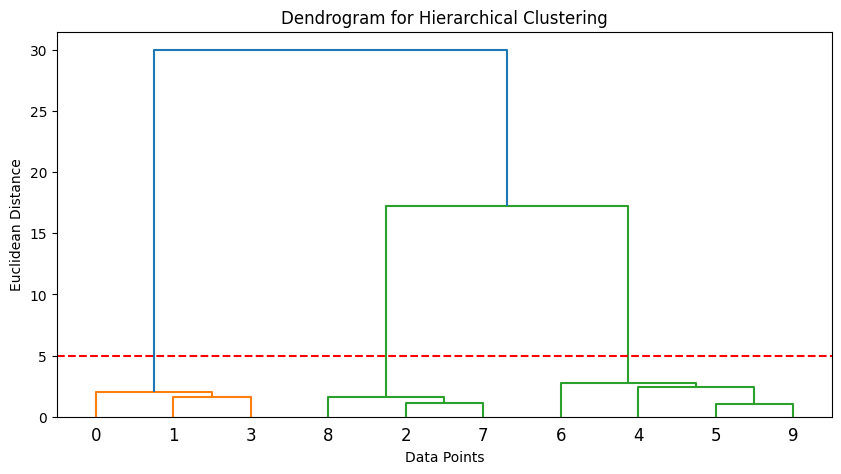

In [4]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.axhline(y=5, color='r', linestyle='--')  # Draw a threshold line at y=5
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### What is Linkage?

* In hierarchical clustering, linkage is the method used to measure the distance between clusters when merging them. It determines how distances between clusters are calculated at each step of the clustering process.
* Types of Linkage Methods:
    * 'ward' -> If your data has compact, spherical clusters (minimizes variance within clusters)
    * 'single' -> If you expect long, chain-like clusters, but beware of sensitivity to noise. (Uses the minimum distance between clusters)
    * 'complete' -> If you want compact clusters and can handle outliers. (Uses the maximum distance)
    * 'average' -> For a balanced approach between compactness and flexibility. (Uses the average distance)


# Mall Customers Segmentation

### Import

In [5]:
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

### Data Read

In [6]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Data Inspection & Visualization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


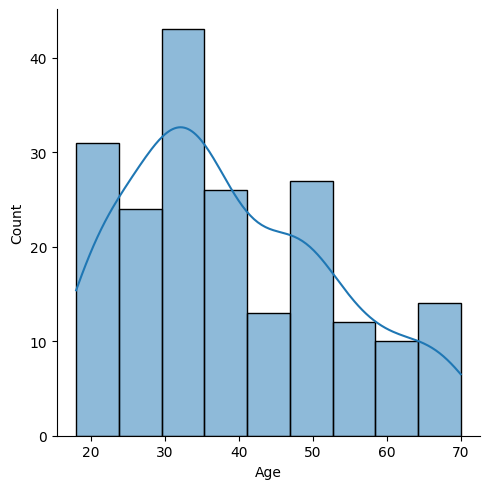

In [10]:
sns.displot(df['Age'], kde=True)

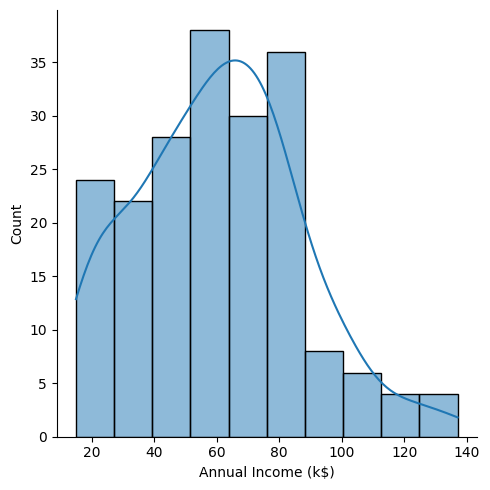

In [11]:
sns.displot(df['Annual Income (k$)'], kde=True)

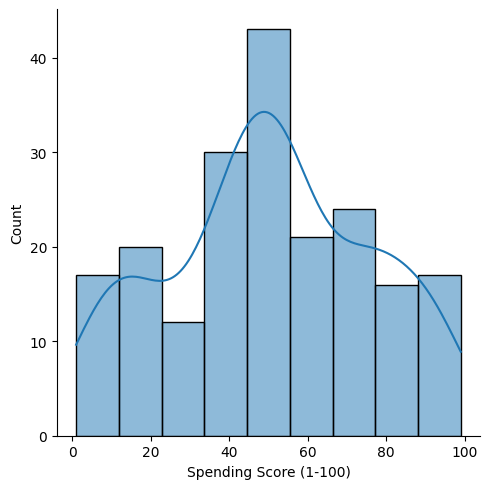

In [12]:
sns.displot(df['Spending Score (1-100)'], kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

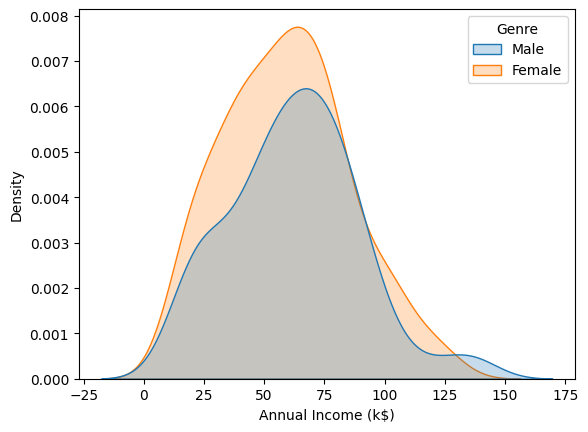

In [13]:
sns.kdeplot(data=df, x=df['Annual Income (k$)'], hue='Genre', fill=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

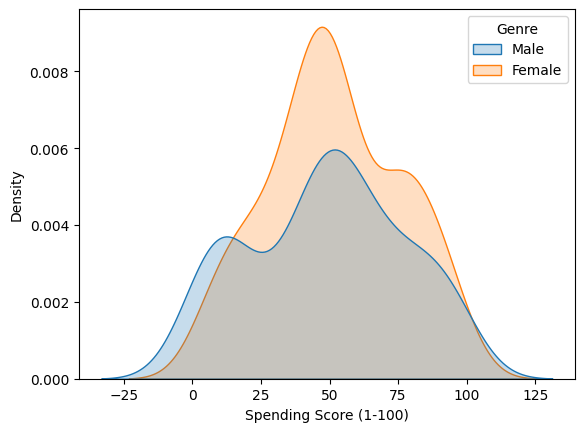

In [14]:
sns.kdeplot(data=df, x=df['Spending Score (1-100)'], hue='Genre', fill=True)

### Data Preprocessing

In [15]:
encoder = LabelEncoder()

df['Genre'] = encoder.fit_transform(df['Genre'])
df['Genre']

,Genre
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


### KMeans

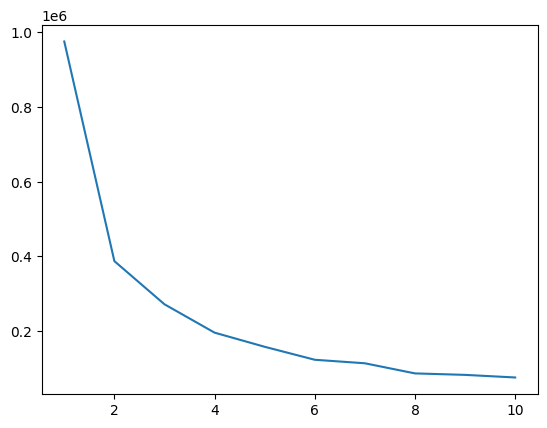

In [16]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42)

df['CustomerLabel'] = kmeans.fit_predict(df)

df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),CustomerLabel
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


In [18]:
df['CustomerLabel'].value_counts()

,count
CustomerLabel,
0,66
2,59
1,39
3,36


### DBSCAN

In [22]:
dbscan = DBSCAN(eps=15, min_samples=4)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

In [23]:
dbscan_labels = df['DBSCAN_Cluster']
valid_mask = dbscan_labels != -1  # Boolean mask for valid clusters
valid_features = df[valid_mask]
valid_labels = dbscan_labels[valid_mask]

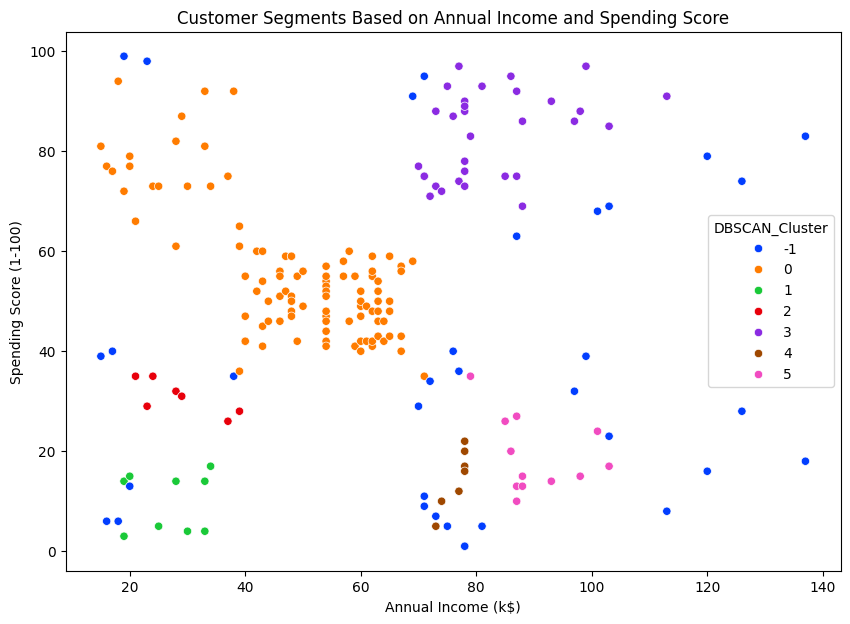

In [24]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='bright')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()